#Student Performance Indicator

Life cycle of Machine Learning project
1. Understanding the problem statement
2. Data Collection
3. Data Checks to perform
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Training
7. Choose best

1) Problem Statement
This project understands how the student's performance (test scores) is affected by other variables such us Gender, Ethnicity, Parental Level of Education, Lunch and Test Preparation course


2) Data collection
Data source=kaggle
The data consist of 8 column and 1000 rows

2.1 import Data and Required Packages
importing pandas, numpy, matplotlib,seaborn and Warnings Library

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv(r"C:\Users\Administrator\Downloads\StudentsPerformance.csv")

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [22]:
df.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [23]:
df.shape

(1000, 8)

2.2 Data information
 -gender: sex of students=male/female
 - race/ethnicity: ethnicity of students=(Group A, B, C, D,E)
 - parental level of education: parents' final education-(bachelor's degree, some college,masters degree, associate's degree, high school)
- lunch: having lunch before test(standard or free/reduced)
- test preparation course: complete or not complete before Test 
math Scrore
reading score 
writing score 

3. Data Checks to perform

 - check Missing values
 - check Duplicates
 - check data type
 - check the number of dataset
 - check various categories present in the different categorical column

In [ ]:
#check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
#check the number of duplicated values
df.duplicated().sum()

np.int64(0)

In [30]:
#check data type
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [31]:
#checking the number of dataset
df.shape

(1000, 8)

In [32]:
#check unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [35]:
df[["gender","race/ethnicity","parental level of education","lunch","test preparation course"]].nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [36]:
#check the statistics of data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


insight
- from above description of numerical data, all means are very close to each other-between 66 and 68.05,
-All standard deviations are also close -between 14.6 and 15.19
-While there is a minimum score 0 for math, for writing minimum is much higher=10, and for reading yet higher=17

Exploring data

In [38]:
print("categories in 'gender' variable:  ", end=" ")
print(df["gender"].unique())

categories in 'gender' variable:   ['female' 'male']


In [40]:
print("categories in 'race/ethnicity' variable:  ", end=" ")
print(df["race/ethnicity"].unique())

categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']


In [41]:
print("categories in 'lunch' variable:  ", end=" ")
print(df["lunch"].unique())

categories in 'lunch' variable:   ['standard' 'free/reduced']


In [42]:
print("categories in 'lunch' variable:  ", end=" ")
print(df["lunch"].unique())

categories in 'lunch' variable:   ['standard' 'free/reduced']


In [44]:
print("categories in 'test preparation course' variable:  ", end=" ")
print(df["test preparation course"].unique())

categories in 'test preparation course' variable:   ['none' 'completed']


In [47]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!=object]
catogical_features=[feature for feature in df.columns if df[feature].dtype==object]

In [48]:
numeric_features

['math score', 'reading score', 'writing score']

In [49]:
catogical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [52]:
print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("We have {} numerical features : {}".format(len(catogical_features),catogical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 numerical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
df["Total Score"]=df['math score']+df['reading score']+df['writing score']
df["Average Score"]=df["Total Score"]/3

In [57]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [67]:
#students who scored full marks in various subjects
reading_full=df[df["reading score"]==100]["Average Score"].count()
math_full=df[df["math score"]==100]["Average Score"].count()
writing_full=df[df["writing score"]==100]["Average Score"].count()
print("Number with full reading score: ",reading_full)
print("Number with full math score: ",math_full)
print("Number with full writing score: ",writing_full)

Number with full reading score:  17
Number with full math score:  7
Number with full writing score:  14


In [71]:
reading_less_20=df[df["reading score"]<20]["Average Score"].count()
math_less_20=df[df["math score"]<20]["Average Score"].count()
writing_less_20=df[df["writing score"]<20]["Average Score"].count()
print("number of students with less than 20 in Reading :{} ".format(reading_less_20))
print("number of students with less than 20 in math :{} ".format(math_less_20))
print("number of students with less than 20 in writing :{} ". format(writing_less_20))

number of students with less than 20 in Reading :1 
number of students with less than 20 in math :4 
number of students with less than 20 in writing :3 


Insights

From above students have performed the worst in math 

While Reading is regarder as the best

Exploring Data (Visualization)
4.1 Visualize average score distribution to make some conclusion
1. Histogram
2. Kernel Distribution Function

Histogram and KDE

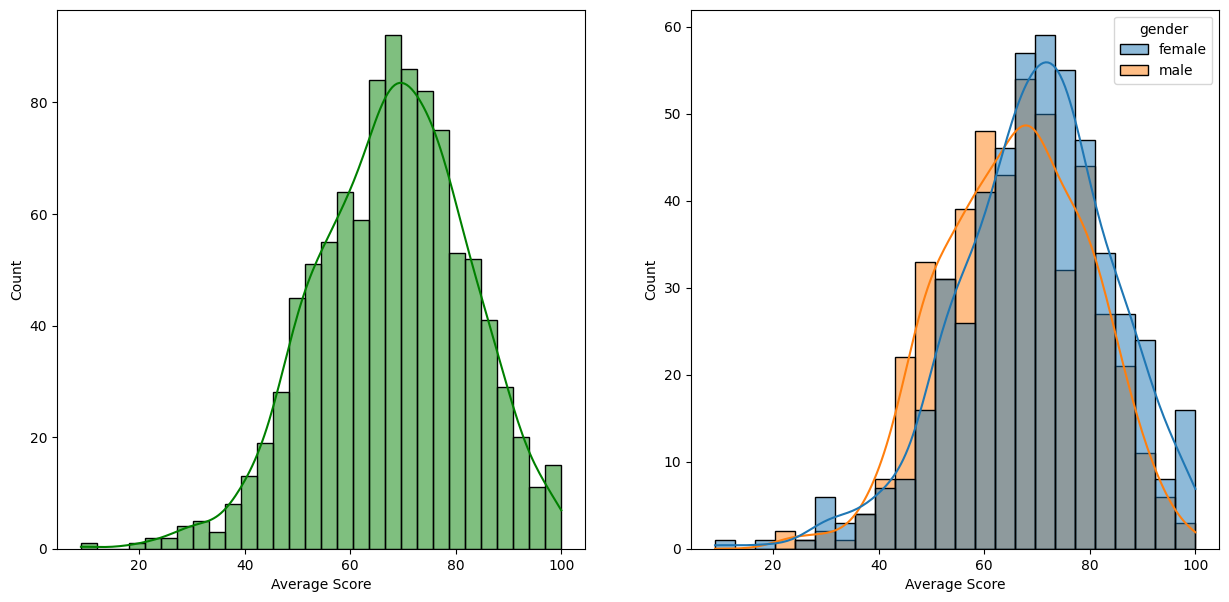

In [72]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="Average Score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="Average Score",kde=True,hue="gender")
plt.show()

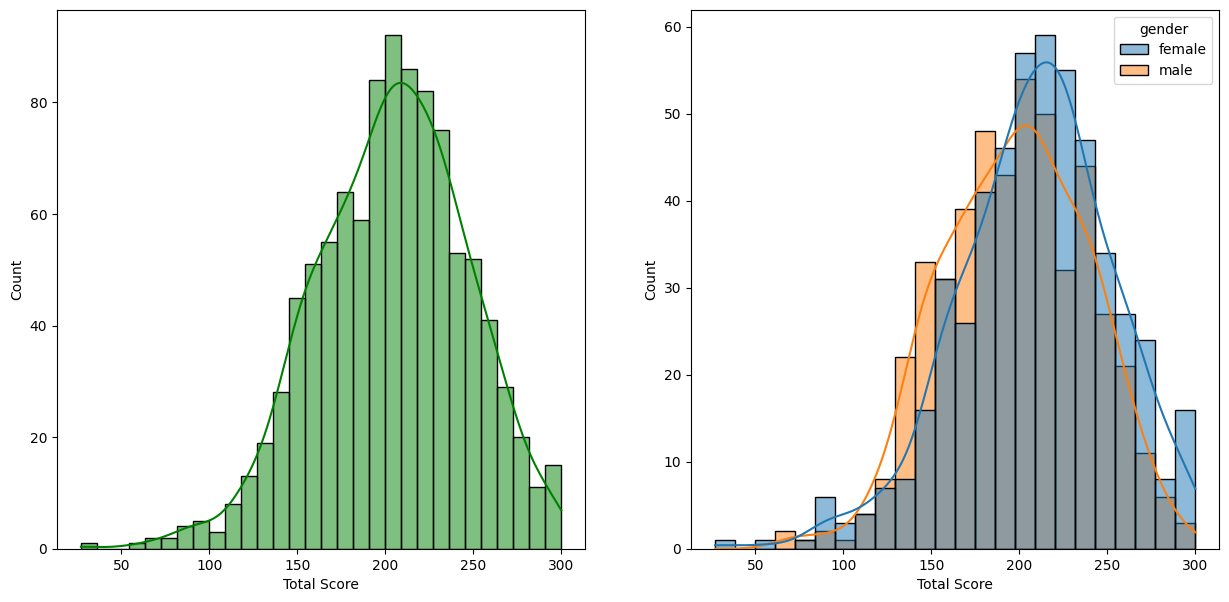

In [73]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="Total Score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="Total Score",kde=True,hue="gender")
plt.show()

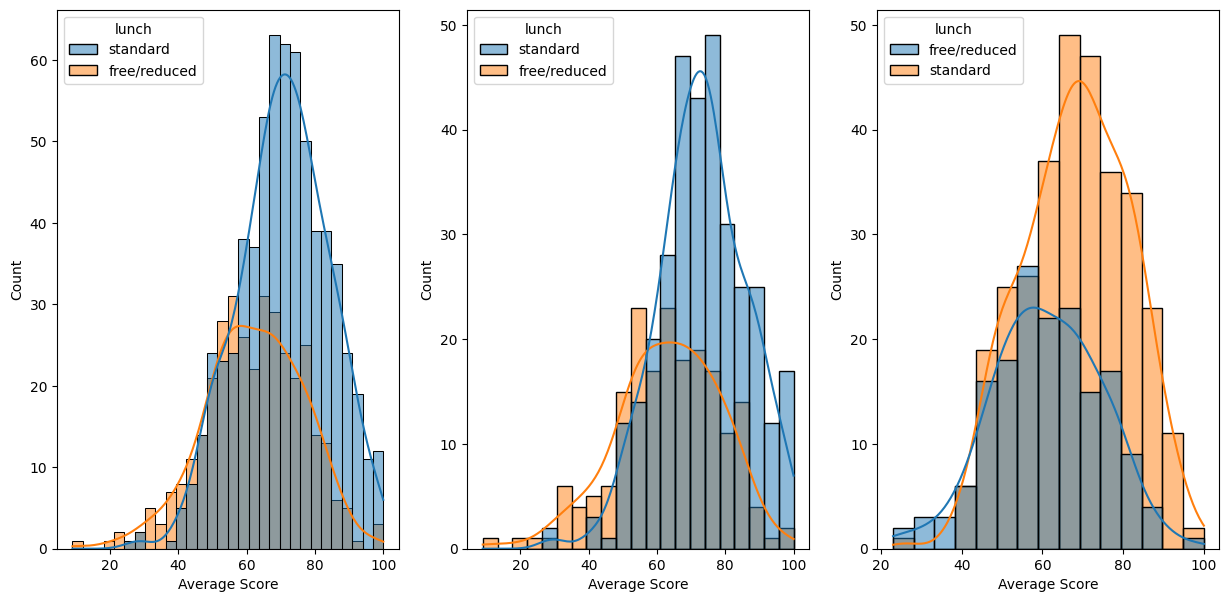

In [75]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x="Average Score",bins=30,kde=True,hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="female"],x="Average Score",kde=True,hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="male"],x="Average Score",kde=True,hue="lunch")
plt.show()

Conclusion

Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

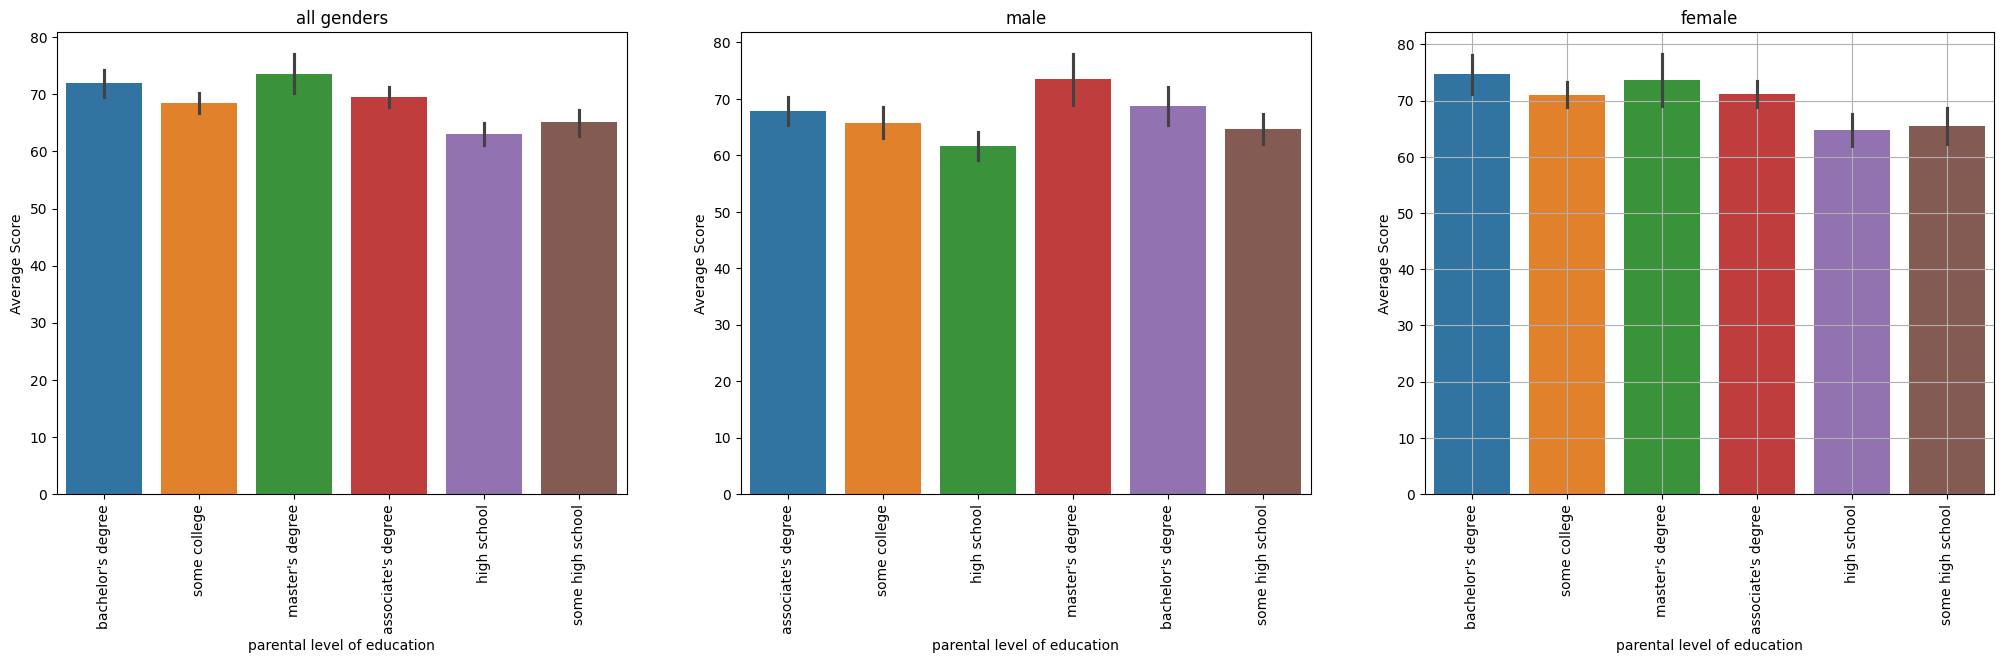

In [96]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.barplot(data=df,y='Average Score',x='parental level of education',hue='parental level of education')
plt.xticks(rotation=90)
plt.title("all genders")
plt.subplot(132)
sns.barplot(data=df[df.gender=='male'],y='Average Score',x='parental level of education',hue='parental level of education')
plt.xticks(rotation=90)
plt.title("male")
plt.subplot(133)
sns.barplot(data=df[df.gender=='female'],y='Average Score',x='parental level of education',hue='parental level of education')
plt.title("female")
plt.grid("both")
plt.xticks(rotation=90)
plt.show()

Conclusion

In general parent's education help student perform well in exam with those in masters performing highest while those in high school performing least though difference is not that much .

2nd plot shows that parent's whose education is of  master's degree their male child tend to perform well in exam

3rd plot we can see there is effect of parent's education on female students with bachelors degree performing best followed closely by masters while high school the least.

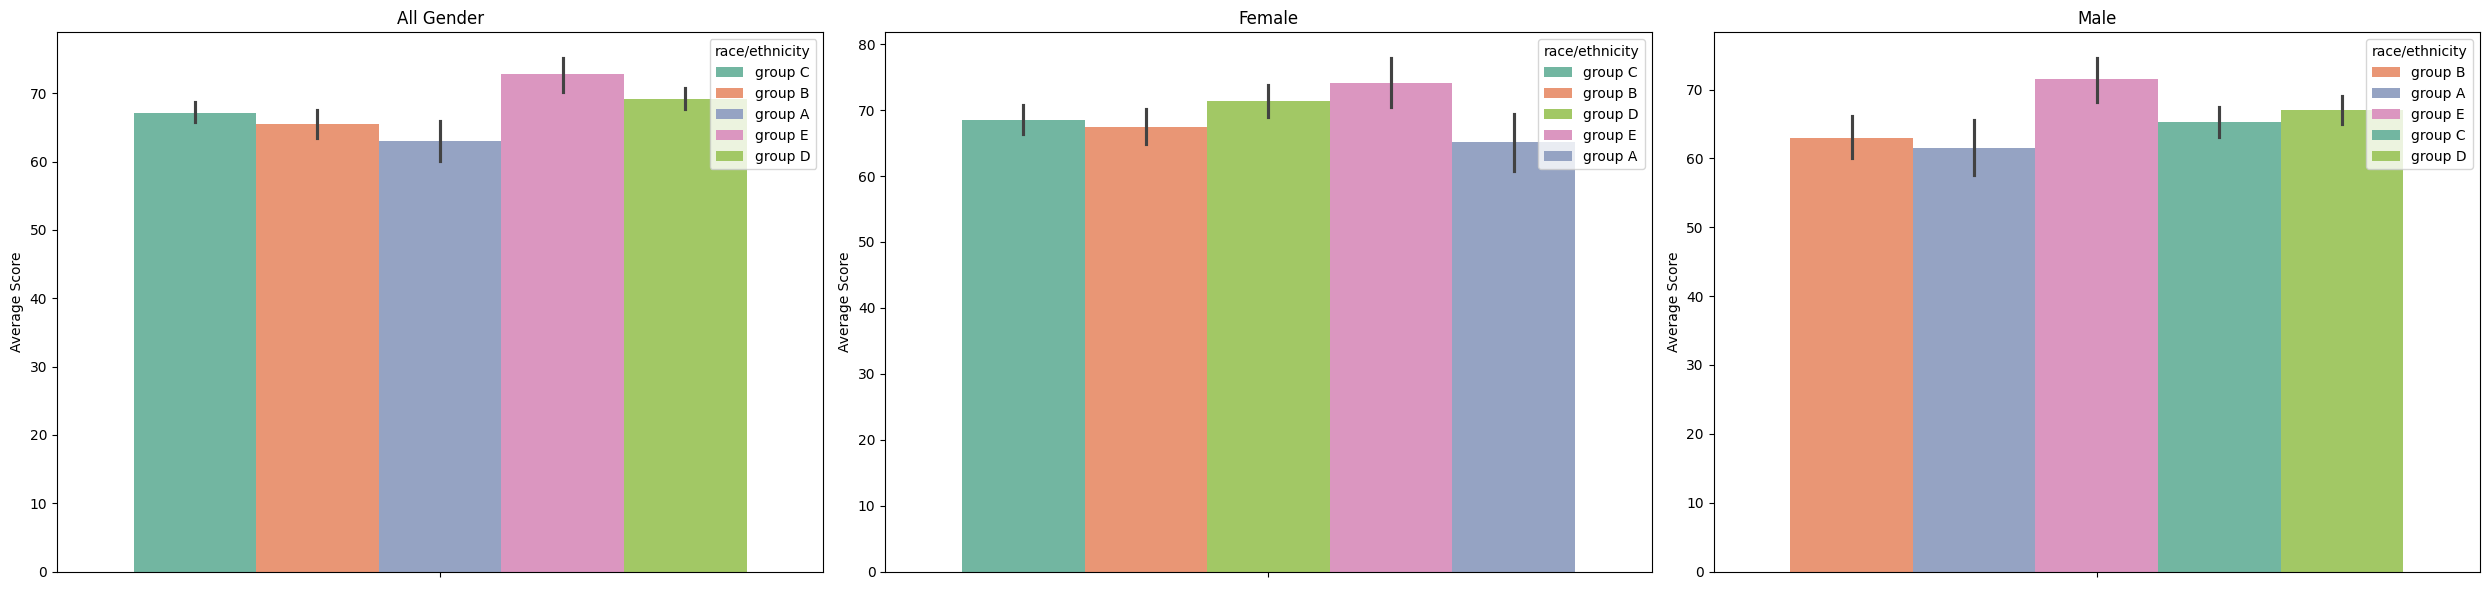

In [106]:
# Sort data by average score
sorted_df = df.sort_values(by='Average Score', ascending=True)

# Define a consistent palette mapping each group to a color
unique_races = sorted_df['race/ethnicity'].unique()
palette = dict(zip(unique_races, sns.color_palette('Set2', n_colors=len(unique_races))))

# Create subplots
plt.figure(figsize=(25, 6))

# All gender
plt.subplot(131)
sns.barplot(data=sorted_df, y='Average Score', hue='race/ethnicity', palette=palette)
plt.title("All Gender")

# Female only
plt.subplot(132)
sns.barplot(data=sorted_df[sorted_df.gender == 'female'], y='Average Score', hue='race/ethnicity', palette=palette)
plt.title("Female")

# Male only
plt.subplot(133)
sns.barplot(data=sorted_df[sorted_df.gender == 'male'], y='Average Score', hue='race/ethnicity', palette=palette)
plt.title("Male")

# Show the plots
plt.tight_layout()
plt.show()


Conclusion

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

4.2 Maximum score of students in all three subjects

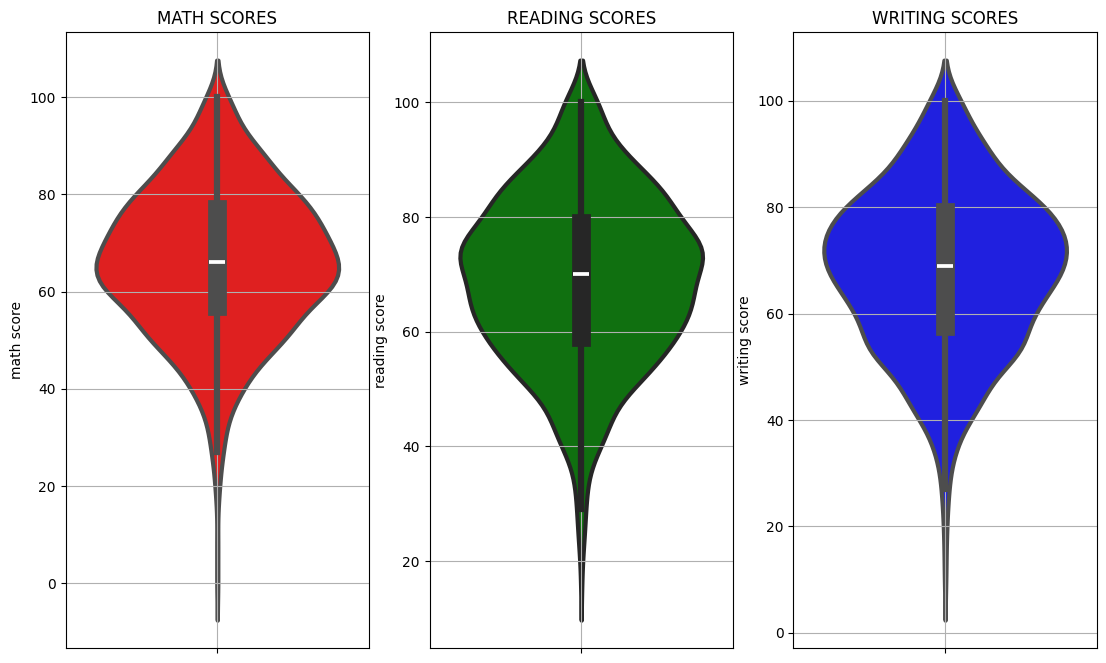

In [109]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.grid()
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.grid()
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.grid()
plt.show()


#CONCLUSION
The three plots show that most students tend to score between 60 and 80 in Math, while in Reading and Writing, most scores fall between 50 and 80.

Gender Column

How is the distribution of gender?

The gender distribution shows how many male and female students are in the dataset. By visualizing this, we can see whether the number of students is balanced between genders or if one group is more represented than the other.


UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

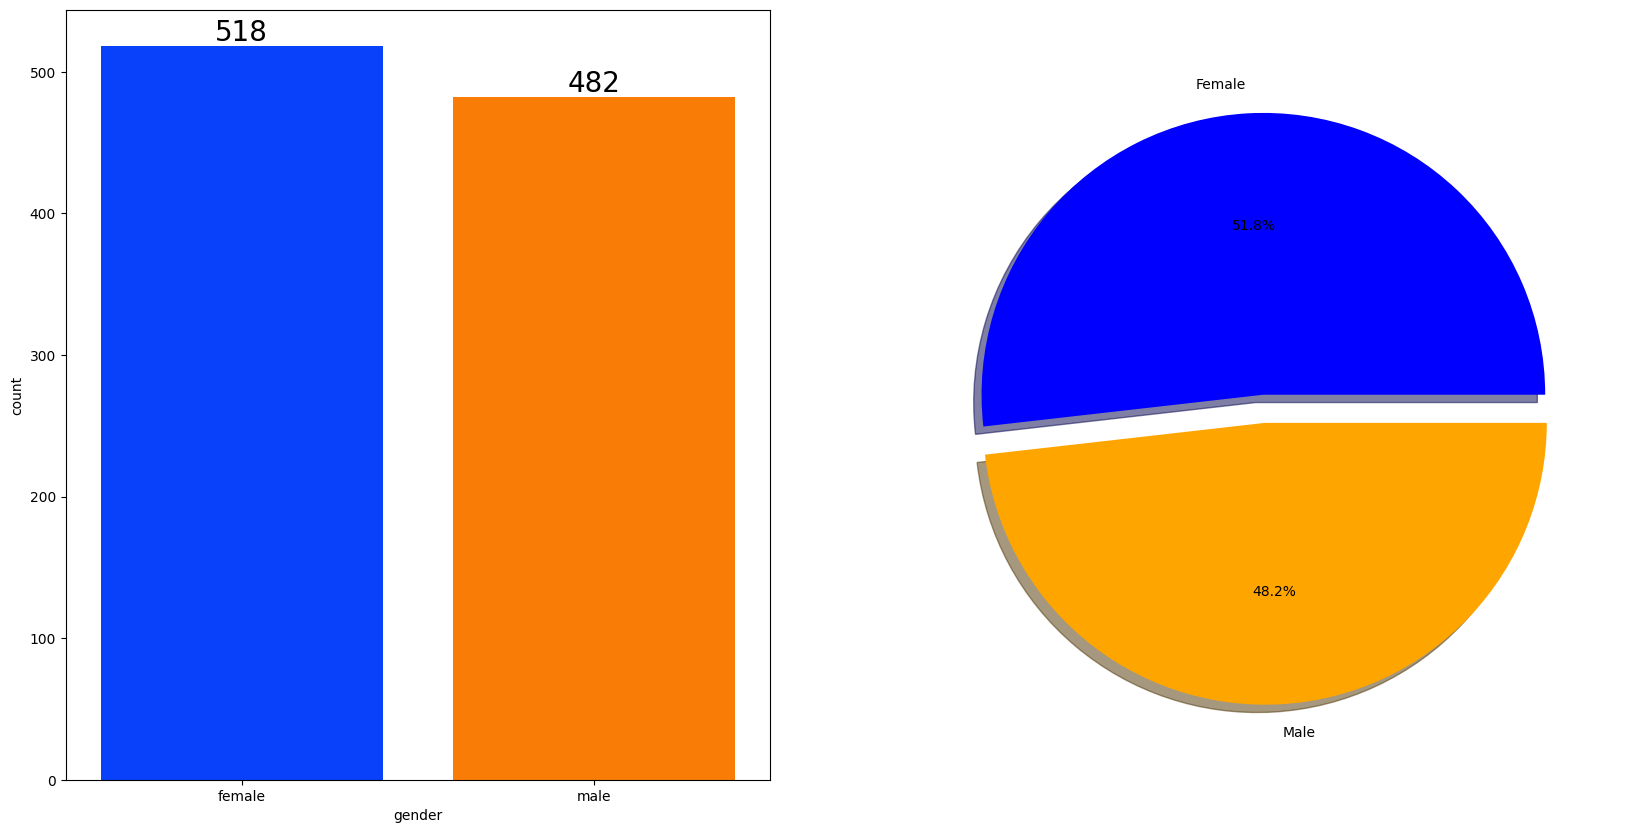

In [115]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['b','orange'])
plt.show()

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

Bivariate Analysis: 

Is there a relationship between gender and how well students perform?

In [117]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,Total Score,Average Score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


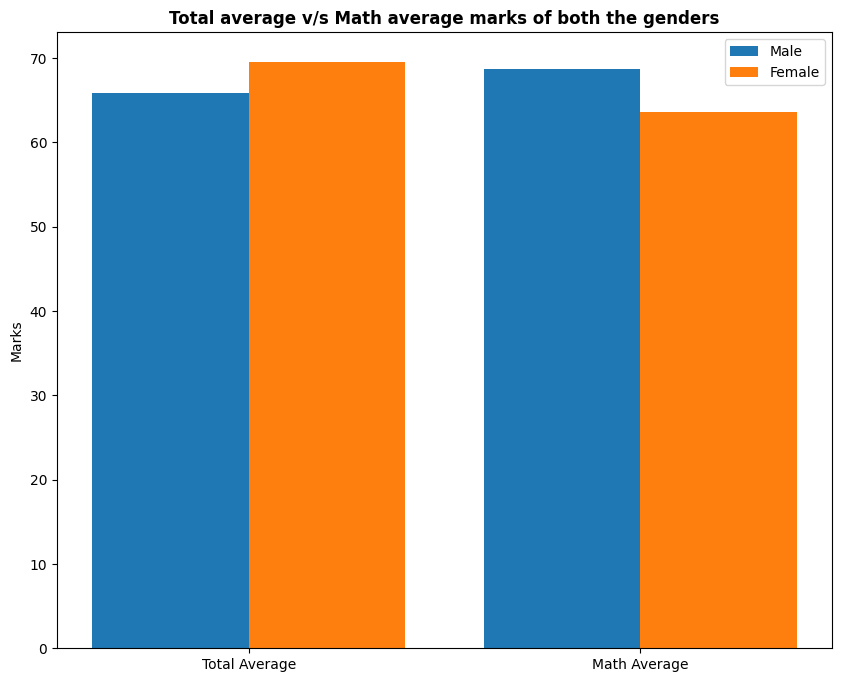

In [118]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average Score'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average Score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

CONCLUSION 

On average, female students perform better overall, but male students tend to score higher in math.

RACE/ETHNICITY COLUMN

Group-wise Distribution
How are students distributed across different race/ethnicity groups? This helps us understand which groups are most represented in the dataset and gives context to our analysis.

Does Race/Ethnicity Impact Student Performance?
We explore whether a student's race or ethnic background shows any patterns in their academic performance. Are certain groups performing better in specific subjects or overall? This analysis may help uncover disparities or trends that could be important for educational support or policy.

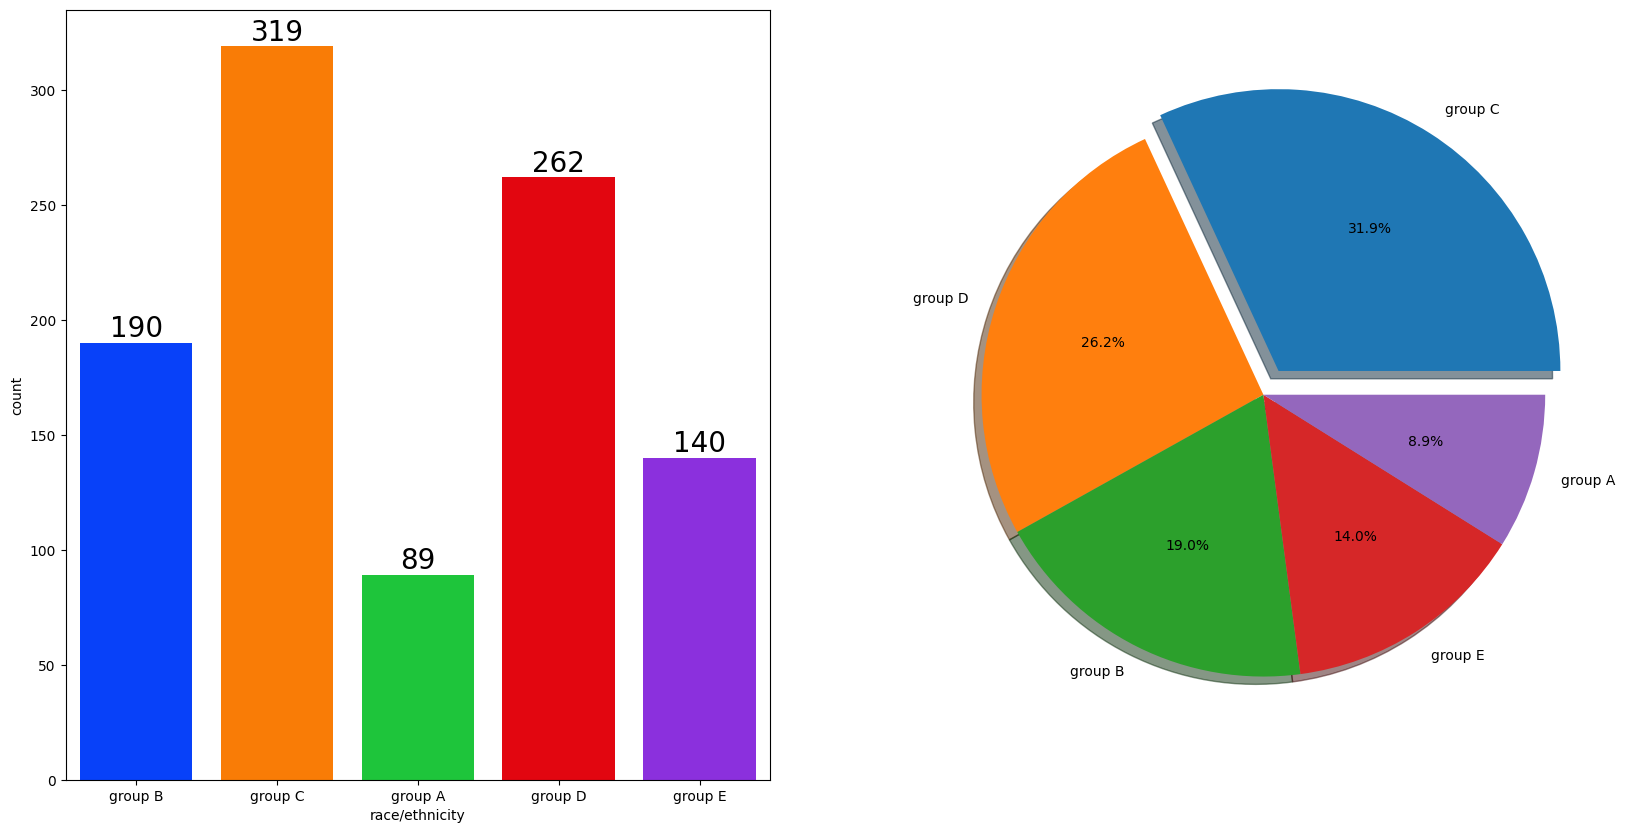

In [119]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

Insights

The majority of students belong to Group C and Group D, indicating these are the most represented race/ethnicity groups in the dataset.

Group A has the lowest number of students, making it the least represented group in the data.

Bivariate Analysis: 

Does Race/Ethnicity Influence Student Performance?

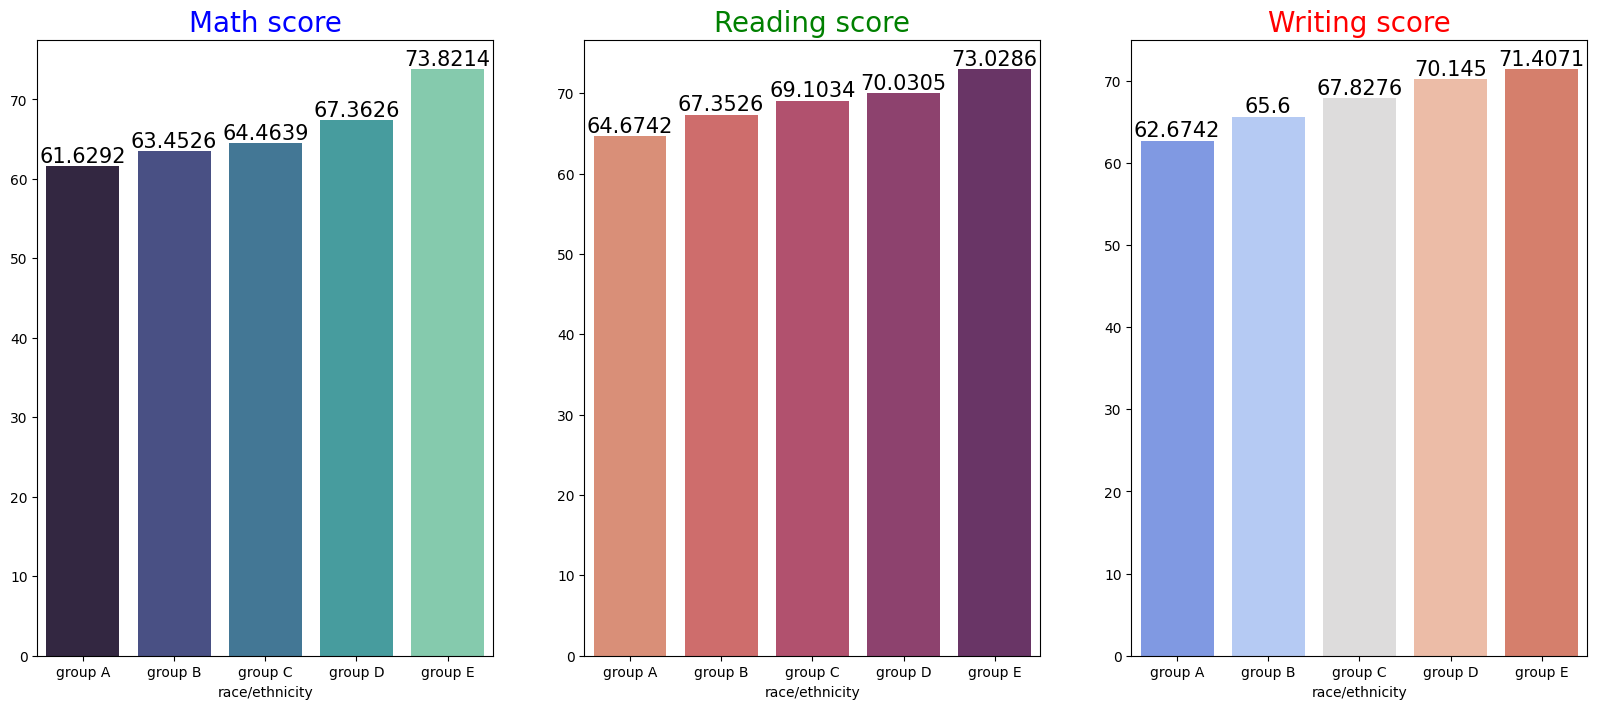

In [122]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='b',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='g',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='r',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

CONCLUSION

Students in Group E achieved the highest scores.

Students in Group A obtained the lowest scores.

Those from lower socioeconomic backgrounds have lower average scores across all subject

LUNCH

What kind of lunch do most students usually have?

Does the type of lunch students eat affect their test scores?

1. UNIVARIATE ANALYSIS 
( Which type of lunch is most common amoung students ? )

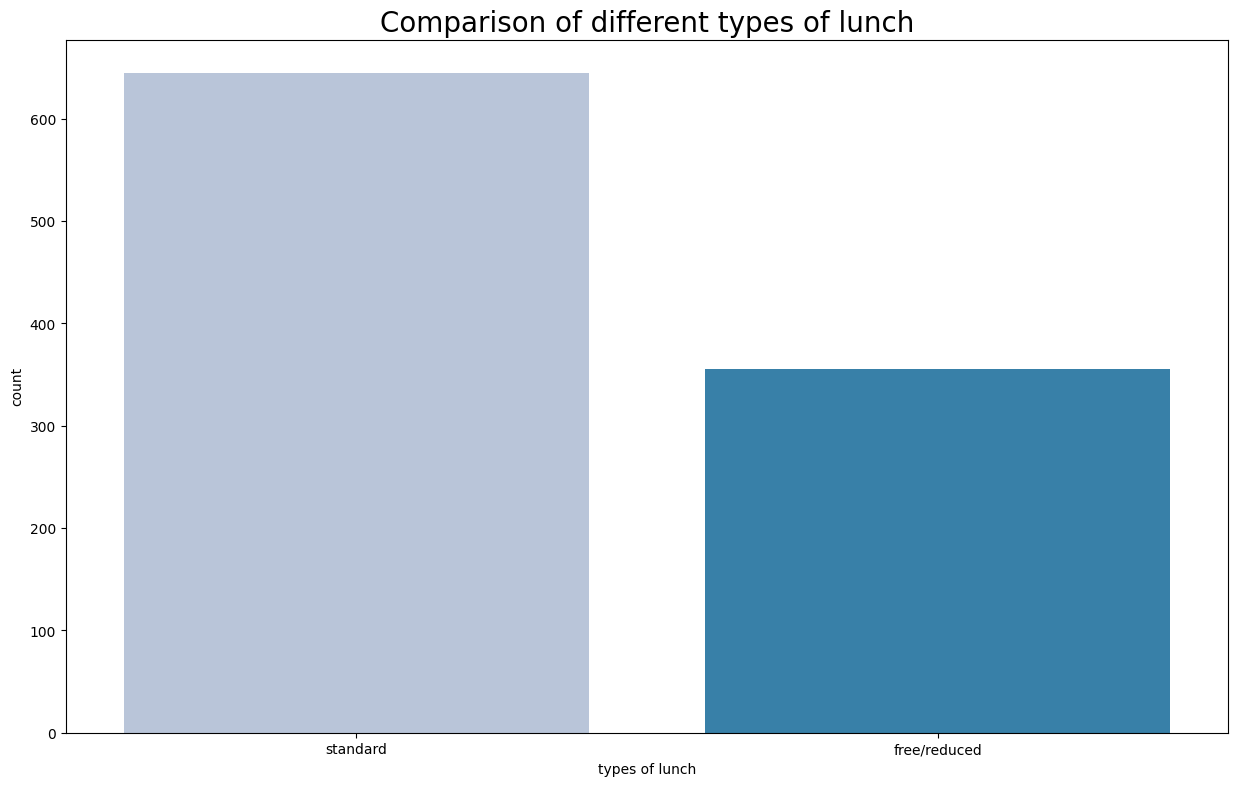

In [126]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x=df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

OBSERVATION

Students being served Standard lunch was more than free lunch

Bivariate Analysis: 

Does the Type of Lunch Affect Students’ Academic Performance?

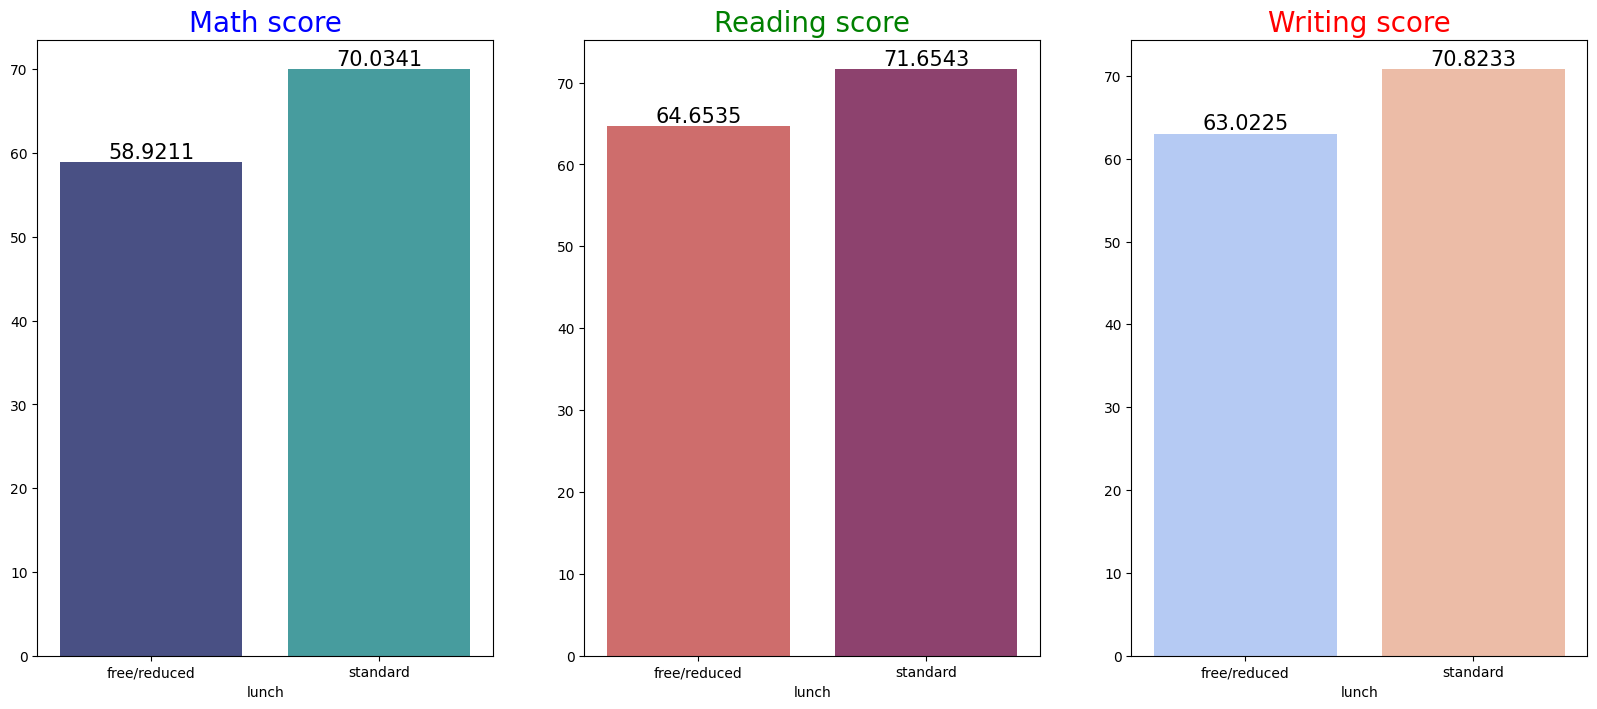

In [127]:
Group_data2=df.groupby('lunch')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='b',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='g',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='r',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


CONCLUSION

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

PARENTAL LEVEL OF EDUCATION COLUMN

What is the educational background of the students’ parents?

Does the level of parental education have any influence on student performance?

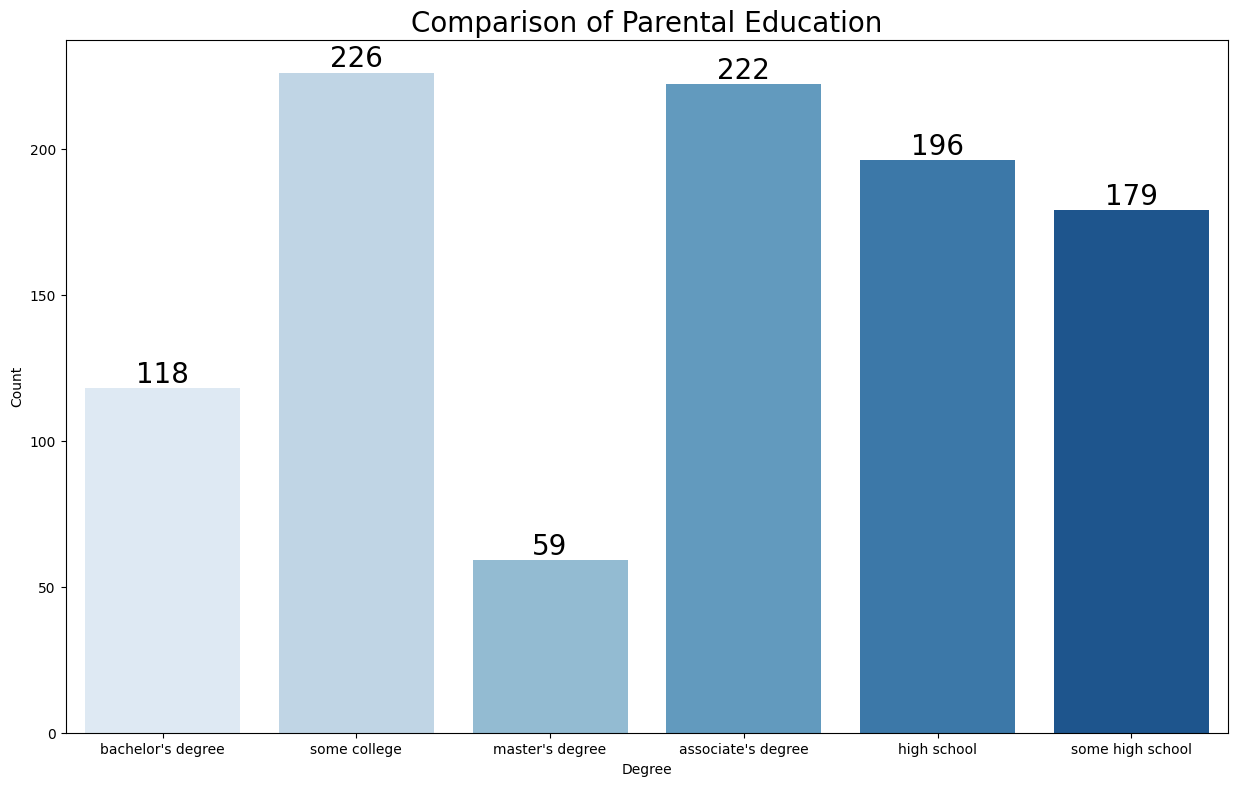

In [135]:
plt.rcParams['figure.figsize']=(15,9)
barplot=sns.countplot(x=df['parental level of education'],palette='Blues')
for container in barplot.containers:
  barplot.bar_label(container,color='black',size=20)
  plt.title('Comparison of Parental Education',fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

OBSERVATIONS;

Largest number of parents are from some college.

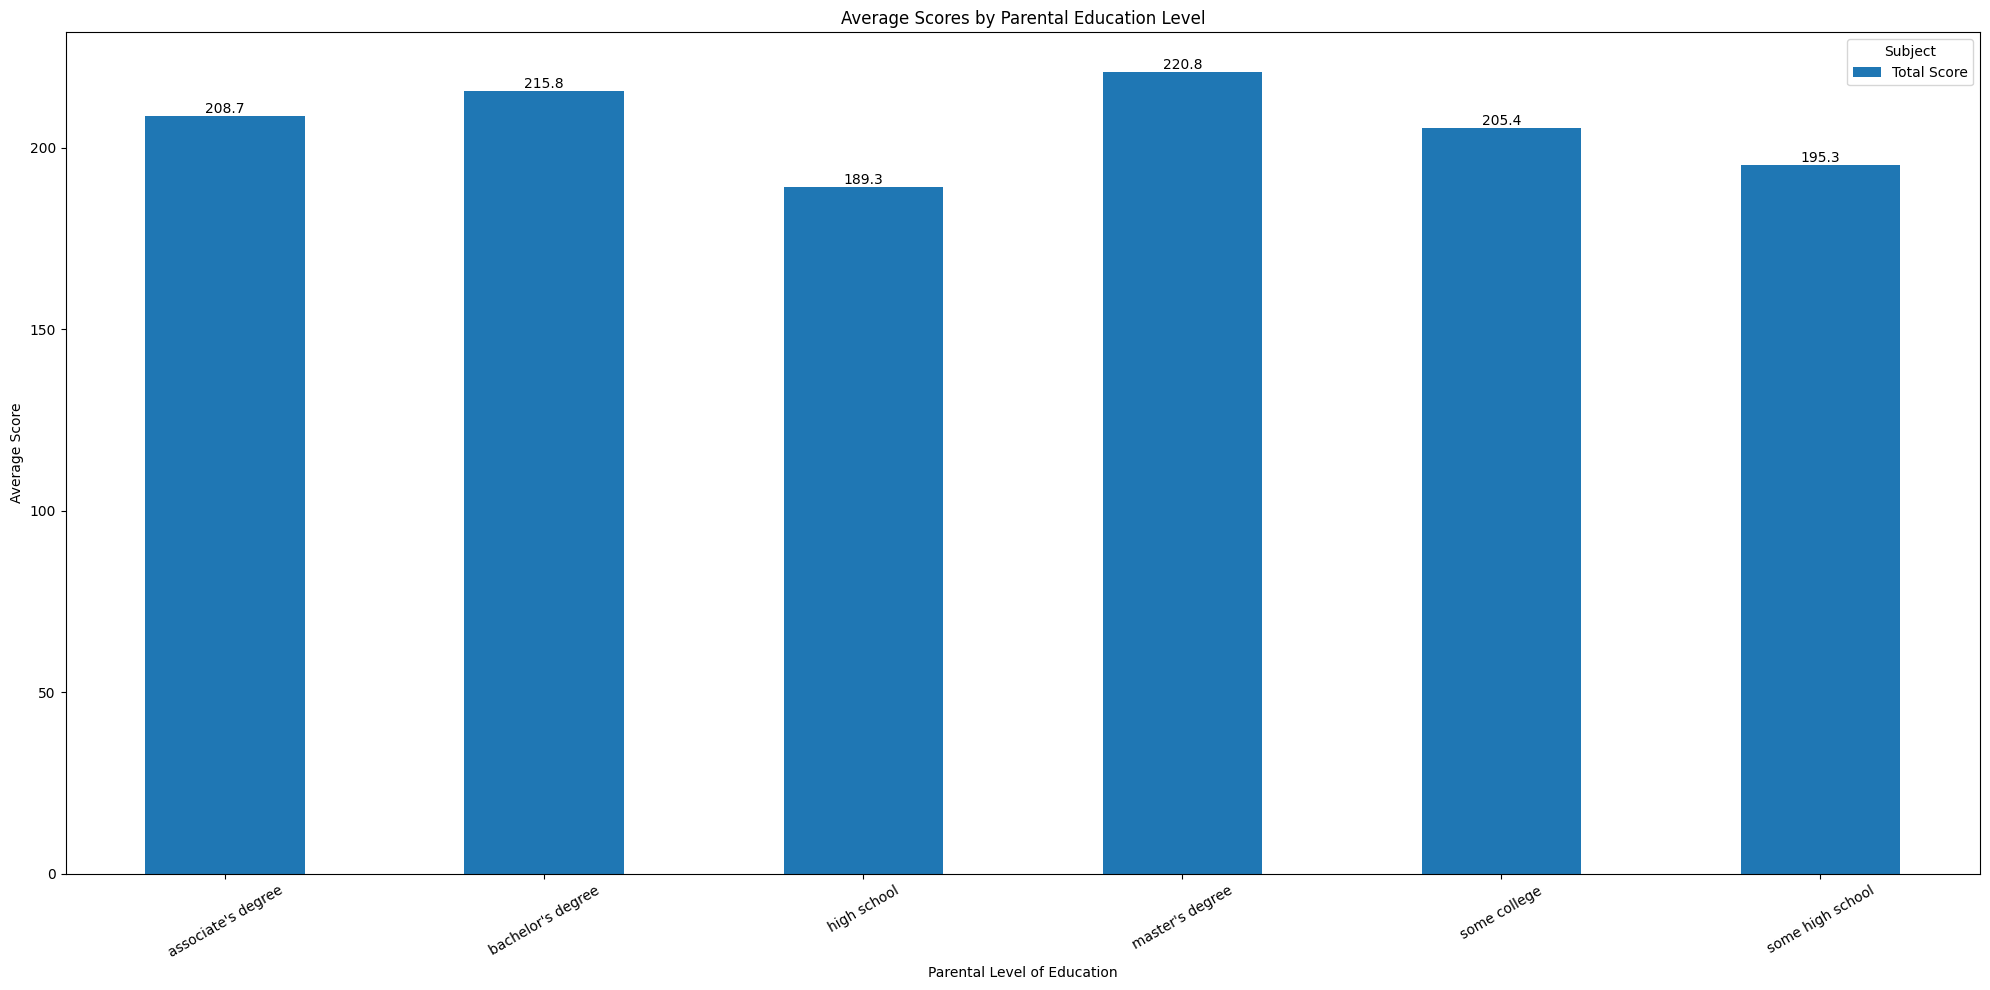

In [151]:
# Group and calculate the mean scores
grouped_df = df.groupby('parental level of education')['Total Score'].mean()

# Plot the grouped bar chart
ax = grouped_df.plot(kind='bar', figsize=(20, 10))

# Set plot labels and title
plt.title('Average Scores by Parental Education Level')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=30)
plt.legend(title='Subject')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)
plt.tight_layout()
plt.show()

OBSERVATION

The score of student whose parents possess master and bachelor level education are higher than others.

TEST PREPARATION COURSE COLUMN

What are the percentages of those who completed and those who did not complete the course?

Is Test prepration course has any impact on student's performance ?

In [152]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


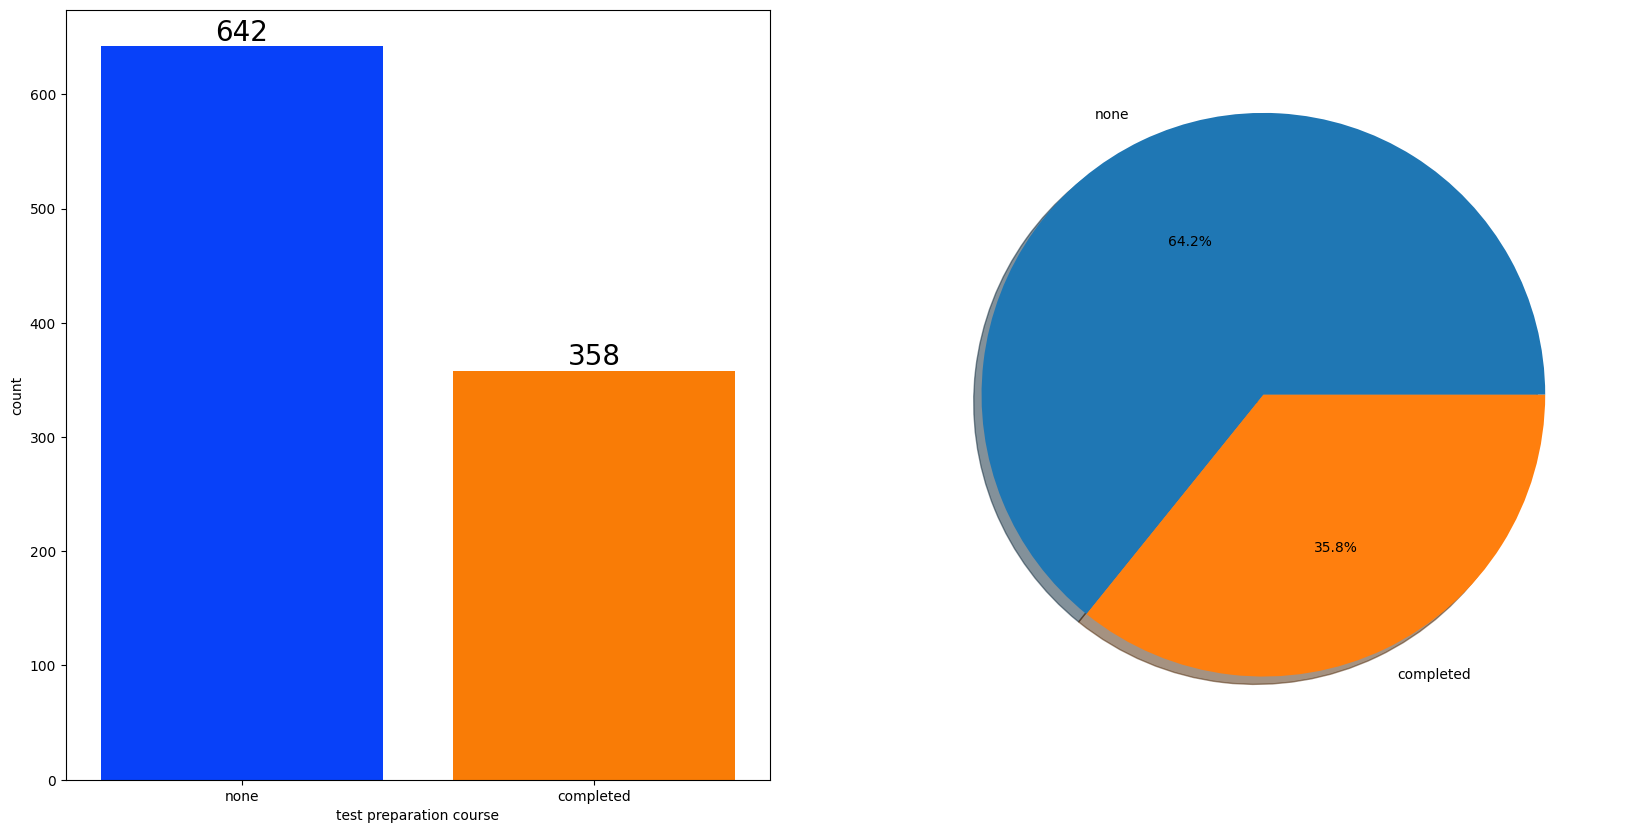

In [154]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['test preparation course'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['test preparation course'].value_counts(),labels=df['test preparation course'].value_counts().index,autopct='%1.1f%%',shadow=True)
plt.show() 

OBSERVATIONS

Students who completed test preparation course are fewer than those who did not complete

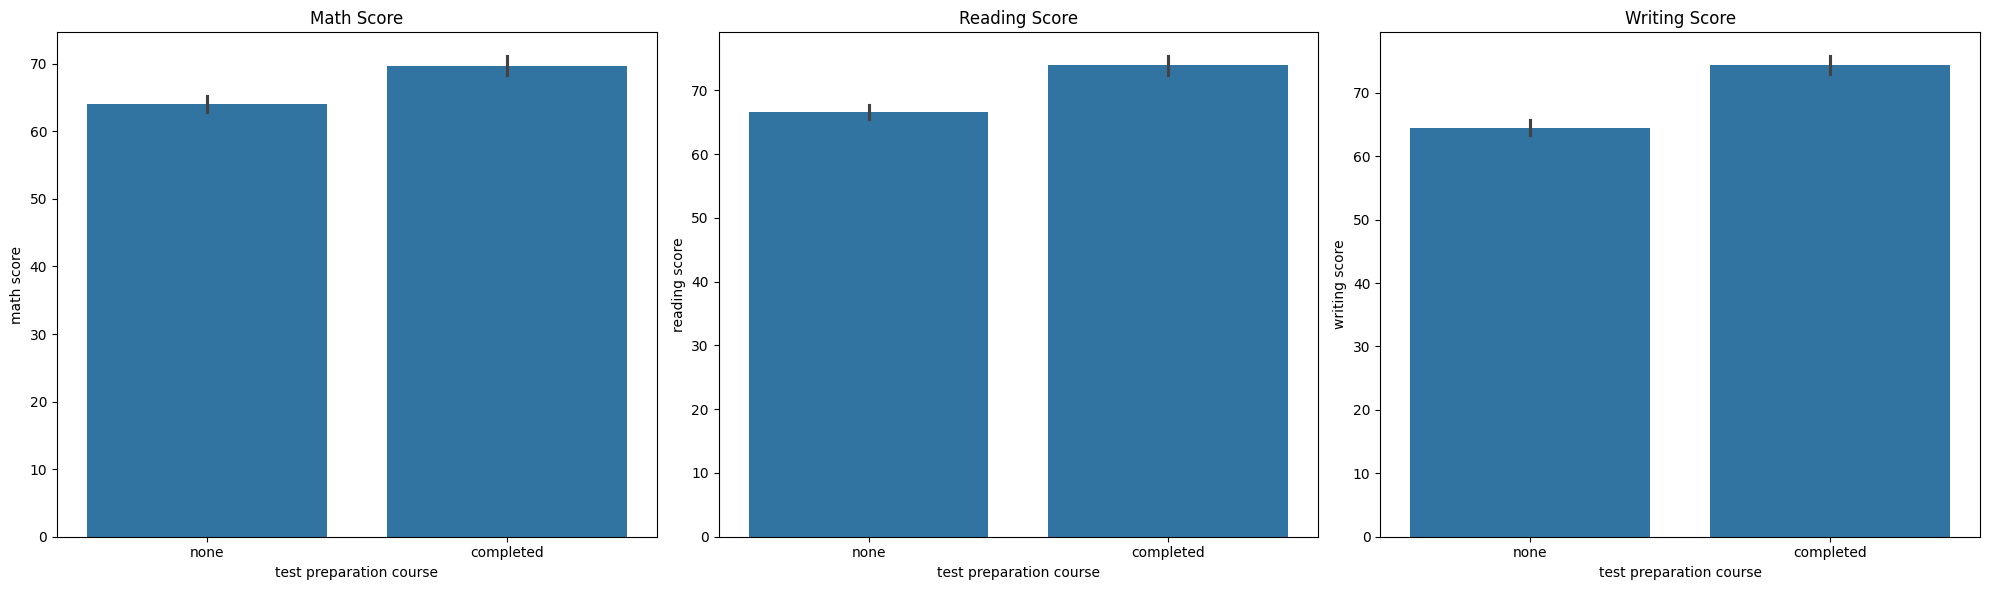

In [161]:
figure,ax=plt.subplots(1,3,figsize=(20,6))
sns.barplot (x=df['test preparation course'], y=df['math score'],ax=ax[0])
ax[0].set_title('Math Score')

sns.barplot (x=df['test preparation course'], y=df['reading score'],ax=ax[1])
ax[1].set_title('Reading Score')
sns.barplot (x=df['test preparation course'], y=df['writing score'],ax=ax[2])
ax[2].set_title('Writing Score')

plt.tight_layout()
plt.show()



OBSERVATIONS

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

 CHECKING OUTLIERS

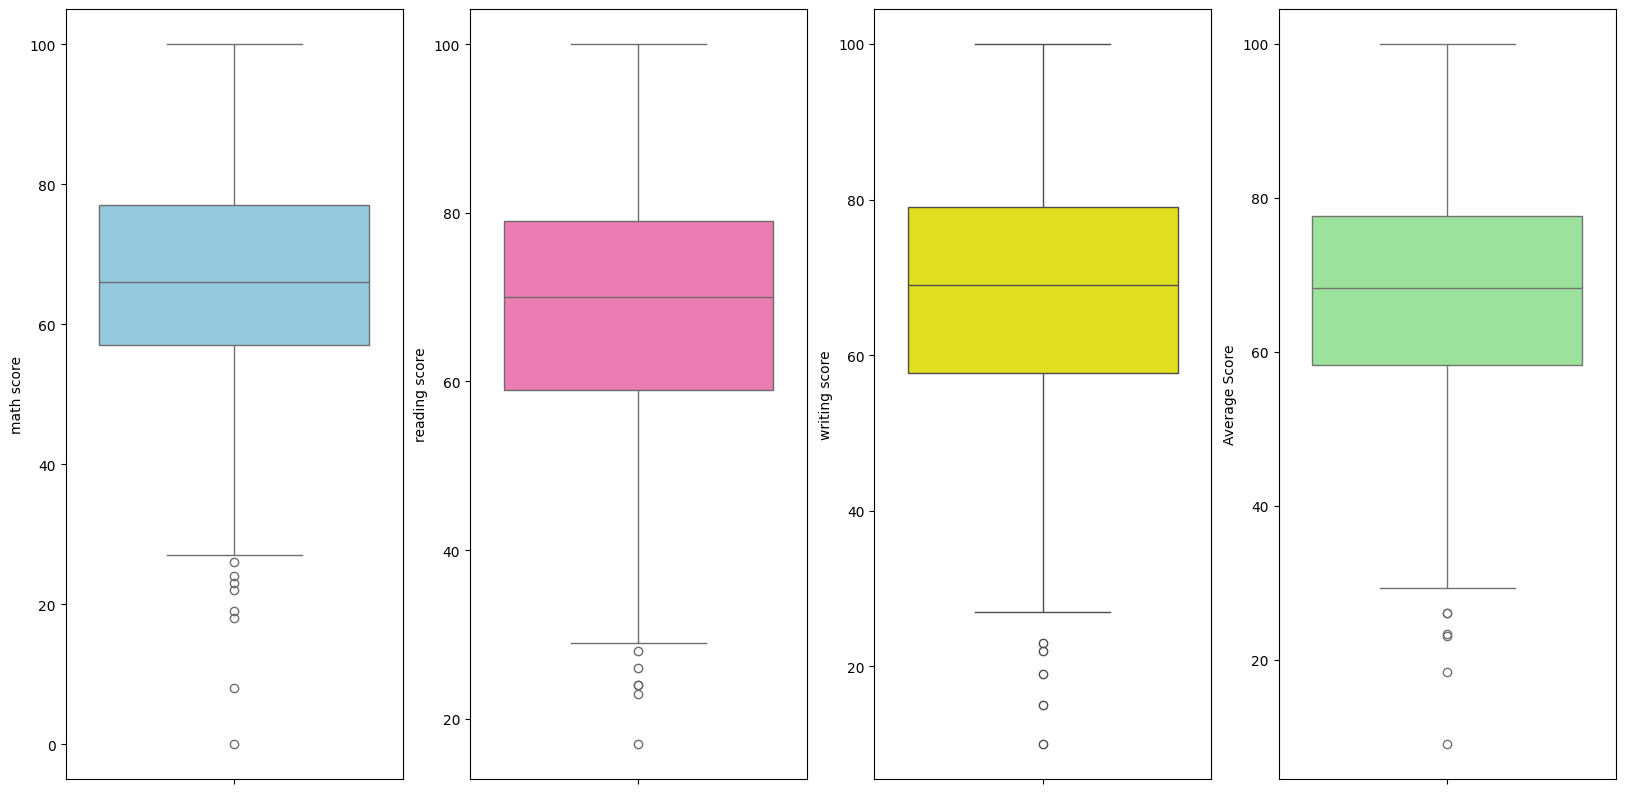

In [165]:
fig,ax=plt.subplots(1,4,figsize=(20,10))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')

plt.subplot(144)
sns.boxplot(df['Average Score'],color='lightgreen')

plt.show()

MULTIVARIATE ANALYSIS 

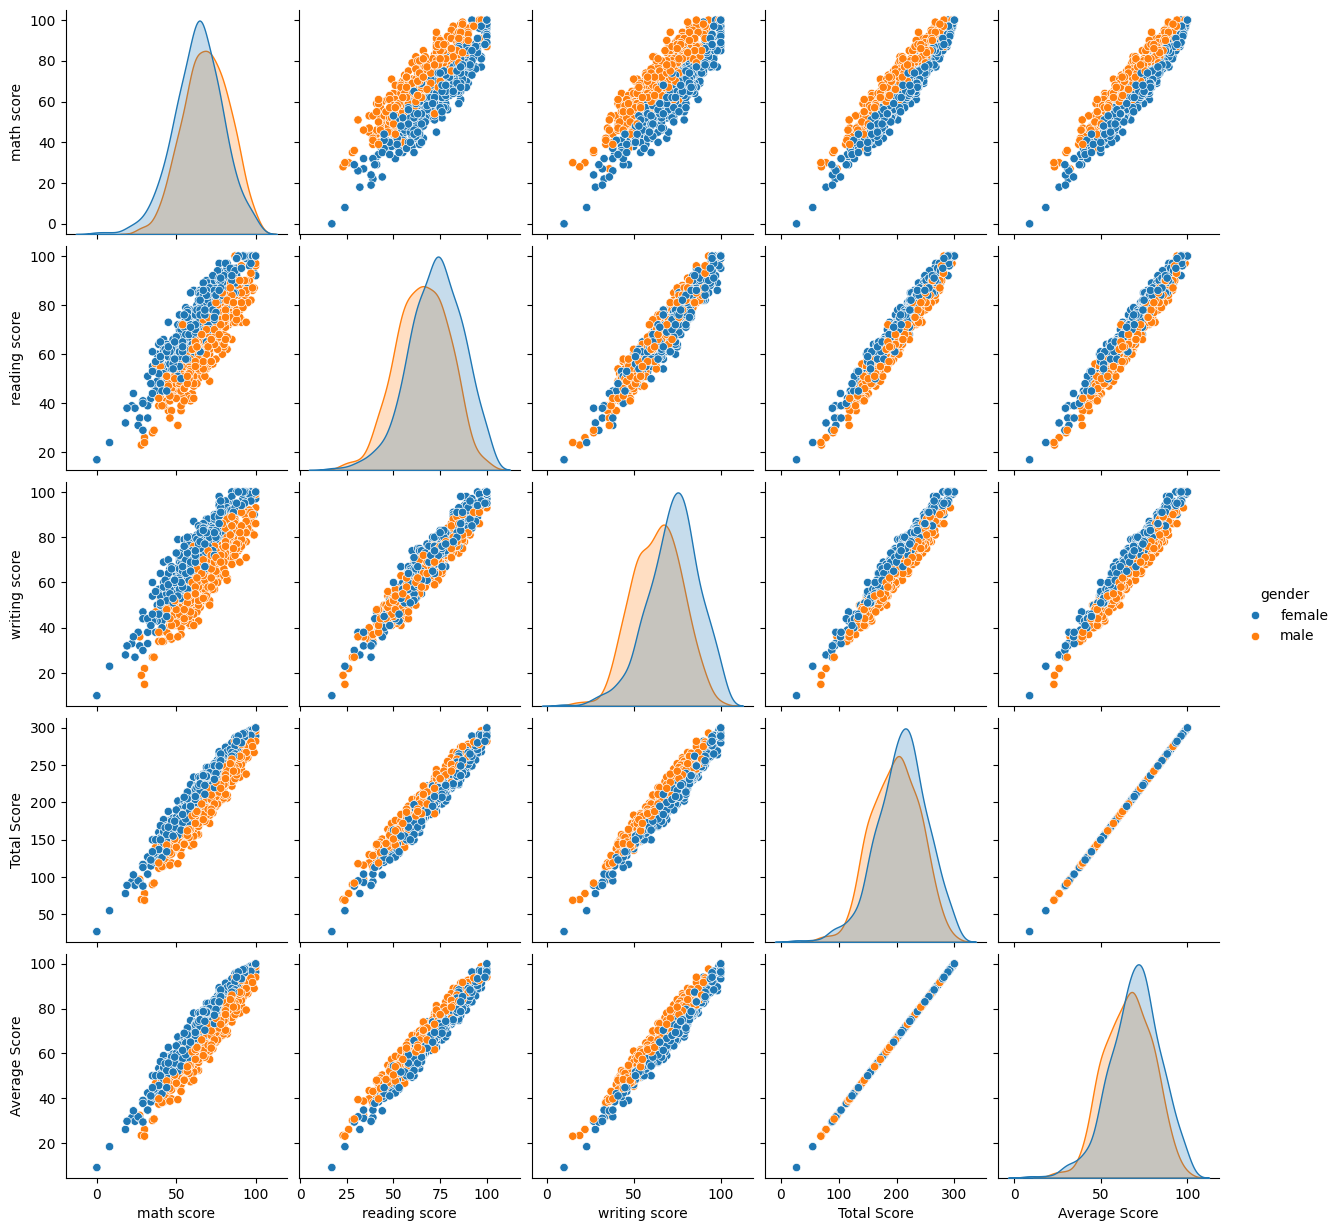

In [168]:
sns.pairplot(df,hue='gender')
plt.show()

OBSERVATIONS

From the above plot it is clear that all the scores increase linearly with each other.

Conclusions on Student Performance Analysis

Impact of Lunch, Race/Ethnicity, and Parental Education
Student performance shows a strong association with:

1.Lunch type: Students who had standard lunch scored higher on average than those with free/reduced lunch.

2. Race/ethnicity: There are visible differences in performance across different race/ethnic groups.

3. Parental level of education: Higher parental education generally correlates with better student scores.

Gender-Based Performance

1. Females outperform males in terms of pass percentage and average scores, especially in reading and writing.

2. Males perform slightly better or at par in math.

Effect of Test Preparation Course

1. While overall performance isn't heavily dependent on test preparation,

Students who completed the test preparation course tend to score better across all subjects.









